In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
data = pd.read_excel('..data/Data_extraction_model_results.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '..data/Data_extraction_model_results.xlsx'

In [29]:
class Timeline:
    def __init__(self, data: pd.DataFrame):
        df = data.sort_values('Study', ascending=False).reset_index(drop=True)
        self.Study = df['Study'].tolist()
        self.timepoints = df['Time_points'].tolist()
        self.ylist = range(4, 4*len(self.Study)+4, 4)

        n = max(1, len(self.Study))
        cmap = plt.get_cmap('viridis')
        self.colors = [cmap(i/(n-1) if n > 1 else 0.5) for i in range(n)]


    def _tokens(self, s):
        if s is None or (isinstance(s, float) and np.isnan(s)) or (isinstance(s, pd.Series) and s.isna().all()):
            return []
        s = str(s).strip()
        if not s:
            return []
        return [t.strip() for t in s.split(',') if t.strip() and t.strip().lower() != 'nan']


    def _parse(self, token: str):
        if ':' in token:
            a, b = token.split(':', 1)
            try:
                a, b = float(a), float(b)
            except ValueError:
                return None
            if b < a:
                a, b = b, a
            return ("range", a, b)
        else:
            try:
                return ("point", float(token))
            except ValueError:
                return None


    def plot_line(self, Study, timepoints, y, colors):
        parsed = [p for t in self._tokens(timepoints) if (p := self._parse(t)) is not None]
        xs = []
        for kind, *vals in parsed:
            xs.extend(vals)
        if xs:
            plt.plot([min(xs), max(xs)], [y, y], '-', linewidth=1,
                     solid_capstyle='round', color=colors)
        pts = []
        for kind, *vals in parsed:
            if kind == "range":
                a, b = vals
                plt.plot([a, b], [y, y], '-', linewidth=6,
                         solid_capstyle='round', color=colors, alpha=0.5)
            else:
                pts.append(vals[0])
        if pts:
            plt.scatter(pts, [y]*len(pts), color=colors)


    def set_yticks(self):
        plt.yticks(self.ylist, self.Study)

    
    def parse_citations(self, citations):
        parsed_citations = []
        for citation in citations:
            name_match = re.match(r'^([A-Za-z\s,.\-]+?)\s*,', citation)
            year_match = re.search(r'\((\d{4})\)', citation)
        
            name = name_match.group(1) if name_match else ''
            year = year_match.group(1) if year_match else ''
        
            result = f"{name.strip()} ({year})"
            parsed_citations.append(result)

        return parsed_citations

    
    def show(self):
        plt.figure(figsize=(10, 30))
        for study, tp, y, color in zip(self.Study, self.timepoints, self.ylist, self.colors):
            self.plot_line(study, tp, y, color)   # pass 'color', not 'colors'
        self.set_yticks()
        plt.axvline(x=0, color='black', linestyle='-')
        plt.title('Measurement points of included studies')
        plt.xlabel('Time since trauma (months)')
        plt.tight_layout()
        ax = plt.gca()
        ax.margins(y=0.01)
        plt.show()


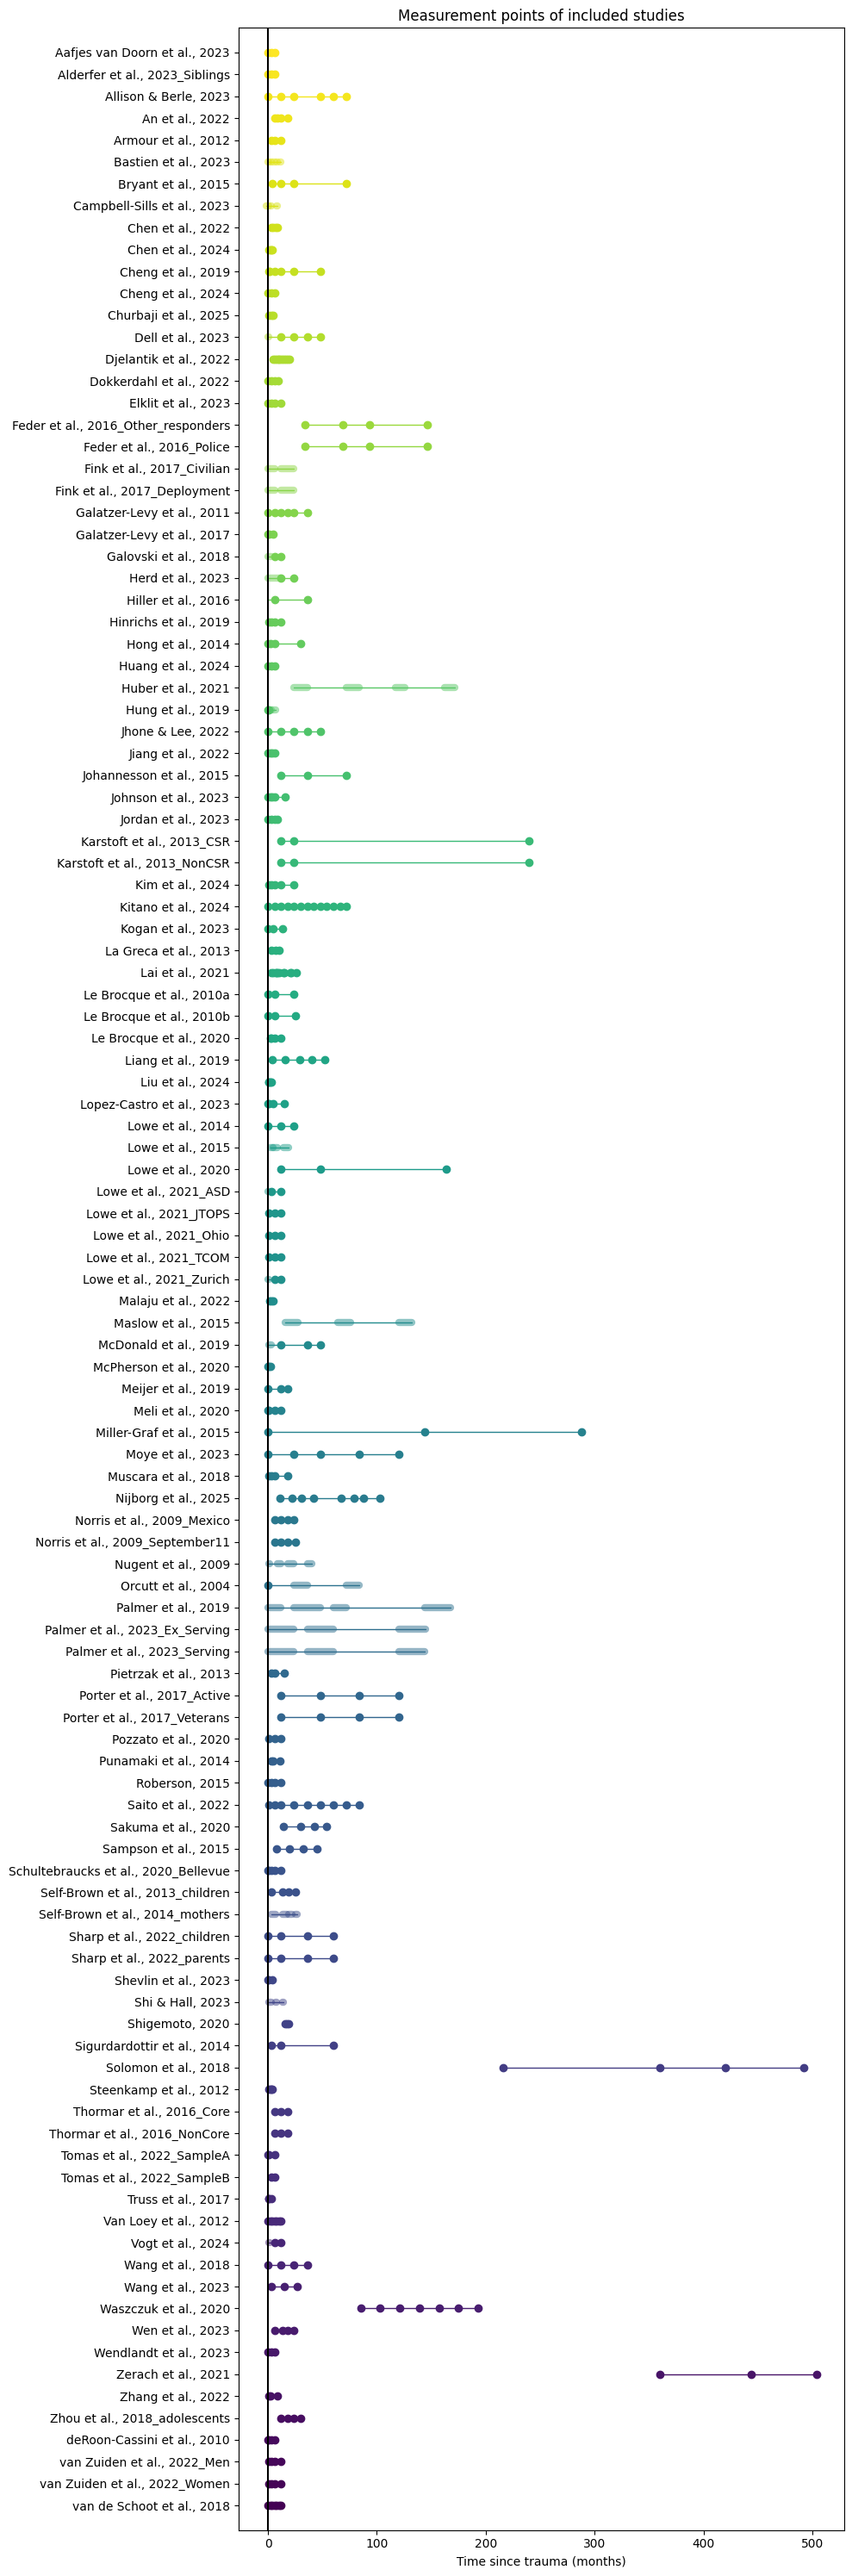

In [30]:
timeline = Timeline(data)
timeline.show()